# Unsupervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**  |  03/17  |  Create notebook, clean data in firmographic dataset.Reorganize folder and files.
- **Kiet Vu**  |  03/17  | Minor Editing.
- **Kiet Vu**  |  04/13  | Run KMode Clustering on specific atributes. 
- **Kiet Vu**  |  04/27  | Create PCA to choose the most important attributes. 
---

- **[Setting Variables for Training](#Variables)**
<br>

- **[Clustering](#Clustering)**: 
Clustering is an unsupervised learning method that groups similar data points together based on the categorical attributes. There are several clustering algorithms available, including k-means, hierarchical clustering, and DBSCAN.
        Columns chosen:
<br>

- **[Principal Component Analysis (PCA)](#PCA)**: 
PCA is a dimensionality reduction technique that can be used to identify the underlying patterns in the categorical data. PCA transforms the categorical attributes into a lower-dimensional space, where the new dimensions are orthogonal and capture the most variance in the data.
        Columns chosen:
<br>

- **[Association Rule Mining](#AssociationRuleMining)**: 
Association rule mining is a technique used to discover frequent co-occurrences or correlations between categorical attributes. It can be used to identify relationships between different attributes and discover interesting patterns in the data.
        Columns chosen:
<br>

- **[Self-Organizing Maps (SOMs)](#SOM)**: 
SOMs are a type of artificial neural network that can be used for clustering and visualization of high-dimensional data. SOMs are useful for discovering hidden structures and patterns in the data.
        Columns chosen:
<br>

**it's important to note that unsupervised learning methods cannot make predictions on new data, as they do not have a target variable to train on. Instead, they can be used for exploratory analysis and to gain insights into the data.**

---

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("Clean Data/prep_dataset_20230425.csv", low_memory=False)
df.head(30)

,unique_identifier,usage,usage_range,B2B_ADDR_STATE,B2B_ACCOUNTING_EXPENSE_CODE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,...,B2B_PURCHASE_PRINT_EXPENSE_CODE,B2B_REST_LEASE_EXPENSE_CODE,B2B_SALES_VOLUME,B2B_SMALL_SIZE_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_UTILITY_CODE,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,status
0,0001230a214b39e0e5c463bfe440fb15,81440.0,4,6,2,0,0,2,4,2,...,7,3,2,0,1,3,3,1,7,2
1,000345e997e72b61b990d2689c76427f,556.3,1,7,3,2,0,0,5,7,...,3,2,2,1,3,0,1,0,3,0
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,32564.0,3,6,2,1,0,1,3,1,...,1,0,1,0,1,0,0,1,8,2
3,00082675e86a9f3cf5fdcc5d4cd9114d,5519.0,1,1,3,1,0,0,3,1,...,7,2,2,1,2,3,2,1,2,2
4,00095201031df44962513f378842d521,5946.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,5,0
5,000a04481ee5acbb856a7c485a67423a,75468.0,4,1,4,3,0,2,4,2,...,3,3,2,0,2,0,3,0,8,2
6,000bee0b537b676a975a15999776581f,88280.0,4,2,2,2,0,0,1,1,...,1,0,1,1,0,3,0,1,4,2
7,000c88d34beda722f7b559bb056b7809,109258.0,4,8,0,0,0,0,0,0,...,0,0,0,1,0,3,0,1,6,0
8,000f645a52095f72ec723133e2b0092c,9686.0,1,6,3,0,0,3,4,2,...,1,2,2,0,1,2,1,0,9,2
9,00109796f3c34d87f1ff2778498a8016,65700.0,4,7,7,7,0,0,7,7,...,7,7,11,0,7,3,7,1,11,2


---
## Setting Variables for Training <a class="anchor" id="Variables"></a>

In [4]:
independents = df[["unique_identifier", "B2B_ADDR_STATE", "B2B_ACCOUNTING_EXPENSE_CODE", 
                        "B2B_ADVERTISING_EXPENSE_CODE", "B2B_BIG_BUSINESS_INDICATOR", 
                        "B2B_BUSINESS_SQUARE_FOOT_NUM", "B2B_COMPUTER_EXPENSE_CODE", 
                        "B2B_CONTRACT_LABOR_EXPENSE_CODE", "B2B_CREDIT_GRADE", "B2B_EMPLOYEE_SIZE", 
                        "B2B_EXPENSE_TYPE", "B2B_HIGH_TECH_FLAG", "B2B_INSURANCE_EXPENSE_CODE", "B2B_LEGAL_EXPENSE_CODE"
                        , "B2B_MEDIUM_SIZE_FLAG", "B2B_MULTI_TENANT_DESCRIP", "B2B_PAYROLL_EXPENSE_CODE",
                        "B2B_PURCHASE_ADMIN_EXPENSE_CODE", "B2B_PURCHASE_PRINT_EXPENSE_CODE", 
                        "B2B_REST_LEASE_EXPENSE_CODE", "B2B_SALES_VOLUME", "B2B_SMALL_SIZE_FLAG", 
                        "B2B_TELECOMMUNICATIONS_CODE", "B2B_TENANT_FLAG", "B2B_UTILITY_CODE", "B2B_WHITE_COLLAR_FLAG", 
                        "CAC_SEGMENT", "usage", "status","usage_range"]]
pd.set_option('display.max_columns', None)
independents

,unique_identifier,B2B_ADDR_STATE,B2B_ACCOUNTING_EXPENSE_CODE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_GRADE,B2B_EMPLOYEE_SIZE,B2B_EXPENSE_TYPE,B2B_HIGH_TECH_FLAG,B2B_INSURANCE_EXPENSE_CODE,B2B_LEGAL_EXPENSE_CODE,B2B_MEDIUM_SIZE_FLAG,B2B_MULTI_TENANT_DESCRIP,B2B_PAYROLL_EXPENSE_CODE,B2B_PURCHASE_ADMIN_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,B2B_REST_LEASE_EXPENSE_CODE,B2B_SALES_VOLUME,B2B_SMALL_SIZE_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_UTILITY_CODE,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status,usage_range
0,0001230a214b39e0e5c463bfe440fb15,6,2,0,0,2,4,2,0,2,1,0,7,2,1,3,3,2,7,3,2,0,1,3,3,1,7,81440.0,2,4
1,000345e997e72b61b990d2689c76427f,7,3,2,0,0,5,7,2,1,1,0,1,4,0,1,2,3,3,2,2,1,3,0,1,0,3,556.3,0,1
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,6,2,1,0,1,3,1,5,2,1,0,2,2,1,1,1,3,1,0,1,0,1,0,0,1,8,32564.0,2,3
3,00082675e86a9f3cf5fdcc5d4cd9114d,1,3,1,0,0,3,1,3,1,1,0,7,2,0,3,3,1,7,2,2,1,2,3,2,1,2,5519.0,2,1
4,00095201031df44962513f378842d521,1,0,0,0,1,0,0,8,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,5,5946.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,fff7c0d1b2f896b1018ef67a9d286361,2,1,0,0,0,2,1,4,0,1,0,1,0,0,3,0,2,0,0,0,1,0,3,0,0,3,11980.0,2,2
49435,fffce8918ebaae88423f62806f22c414,2,2,0,0,0,3,2,3,0,1,0,1,1,0,1,1,3,3,1,0,1,1,0,0,0,3,11080.0,0,2
49436,fffd155082881fa090b08ca6ceed7005,8,1,0,0,0,2,1,3,1,1,0,1,1,0,1,0,2,0,1,0,1,0,0,1,1,1,93876.0,0,4
49437,fffe3fcb6ca0166ec15af3958ac145e8,2,2,1,0,1,4,1,2,1,1,0,1,3,0,3,2,3,6,0,1,1,1,3,0,1,8,9072.0,0,1


In [5]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unique_identifier                49439 non-null  object 
 1   B2B_ADDR_STATE                   49439 non-null  int64  
 2   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  int64  
 3   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  int64  
 4   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  int64  
 5   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  int64  
 6   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  int64  
 7   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  int64  
 8   B2B_CREDIT_GRADE                 49439 non-null  int64  
 9   B2B_EMPLOYEE_SIZE                49439 non-null  int64  
 10  B2B_EXPENSE_TYPE                 49439 non-null  int64  
 11  B2B_HIGH_TECH_FLAG               49439 non-null  int64  
 12  B2B_INSURANCE_EXPE

In [6]:
#label encoding data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

independents.iloc[:, 2:-2] = independents.iloc[:, 2:-2].apply(le.fit_transform)
independents

C:\Users\PREDATOR\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,unique_identifier,B2B_ADDR_STATE,B2B_ACCOUNTING_EXPENSE_CODE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_GRADE,B2B_EMPLOYEE_SIZE,B2B_EXPENSE_TYPE,B2B_HIGH_TECH_FLAG,B2B_INSURANCE_EXPENSE_CODE,B2B_LEGAL_EXPENSE_CODE,B2B_MEDIUM_SIZE_FLAG,B2B_MULTI_TENANT_DESCRIP,B2B_PAYROLL_EXPENSE_CODE,B2B_PURCHASE_ADMIN_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,B2B_REST_LEASE_EXPENSE_CODE,B2B_SALES_VOLUME,B2B_SMALL_SIZE_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_UTILITY_CODE,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status,usage_range
0,0001230a214b39e0e5c463bfe440fb15,6,2,0,0,2,4,2,0,2,1,0,7,2,1,3,3,2,7,3,2,0,1,3,3,1,7,27961,2,4
1,000345e997e72b61b990d2689c76427f,7,3,2,0,0,5,7,2,1,1,0,1,4,0,1,2,3,3,2,2,1,3,0,1,0,3,327,0,1
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,6,2,1,0,1,3,1,5,2,1,0,2,2,1,1,1,3,1,0,1,0,1,0,0,1,8,18772,2,3
3,00082675e86a9f3cf5fdcc5d4cd9114d,1,3,1,0,0,3,1,3,1,1,0,7,2,0,3,3,1,7,2,2,1,2,3,2,1,2,3914,2,1
4,00095201031df44962513f378842d521,1,0,0,0,1,0,0,8,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,5,4248,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,fff7c0d1b2f896b1018ef67a9d286361,2,1,0,0,0,2,1,4,0,1,0,1,0,0,3,0,2,0,0,0,1,0,3,0,0,3,8886,2,2
49435,fffce8918ebaae88423f62806f22c414,2,2,0,0,0,3,2,3,0,1,0,1,1,0,1,1,3,3,1,0,1,1,0,0,0,3,8214,0,2
49436,fffd155082881fa090b08ca6ceed7005,8,1,0,0,0,2,1,3,1,1,0,1,1,0,1,0,2,0,1,0,1,0,0,1,1,1,29142,0,4
49437,fffe3fcb6ca0166ec15af3958ac145e8,2,2,1,0,1,4,1,2,1,1,0,1,3,0,3,2,3,6,0,1,1,1,3,0,1,8,6726,0,1


In [7]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   unique_identifier                49439 non-null  object
 1   B2B_ADDR_STATE                   49439 non-null  int64 
 2   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  int64 
 3   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  int64 
 4   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  int64 
 5   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  int64 
 6   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  int64 
 7   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  int64 
 8   B2B_CREDIT_GRADE                 49439 non-null  int64 
 9   B2B_EMPLOYEE_SIZE                49439 non-null  int64 
 10  B2B_EXPENSE_TYPE                 49439 non-null  int64 
 11  B2B_HIGH_TECH_FLAG               49439 non-null  int64 
 12  B2B_INSURANCE_EXPENSE_CODE      

In [8]:
# Setting independent and target variables
X = independents.iloc[:,2:-3]
y = df["usage_range"]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  int64
 1   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  int64
 2   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  int64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  int64
 4   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  int64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  int64
 6   B2B_CREDIT_GRADE                 49439 non-null  int64
 7   B2B_EMPLOYEE_SIZE                49439 non-null  int64
 8   B2B_EXPENSE_TYPE                 49439 non-null  int64
 9   B2B_HIGH_TECH_FLAG               49439 non-null  int64
 10  B2B_INSURANCE_EXPENSE_CODE       49439 non-null  int64
 11  B2B_LEGAL_EXPENSE_CODE           49439 non-null  int64
 12  B2B_MEDIUM_SIZE_FLAG             49439 non-nul

In [10]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49439 entries, 0 to 49438
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ACCOUNTING_EXPENSE_CODE      49439 non-null  float64
 1   B2B_ADVERTISING_EXPENSE_CODE     49439 non-null  float64
 2   B2B_BIG_BUSINESS_INDICATOR       49439 non-null  float64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     49439 non-null  float64
 4   B2B_COMPUTER_EXPENSE_CODE        49439 non-null  float64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  49439 non-null  float64
 6   B2B_CREDIT_GRADE                 49439 non-null  float64
 7   B2B_EMPLOYEE_SIZE                49439 non-null  float64
 8   B2B_EXPENSE_TYPE                 49439 non-null  float64
 9   B2B_HIGH_TECH_FLAG               49439 non-null  float64
 10  B2B_INSURANCE_EXPENSE_CODE       49439 non-null  float64
 11  B2B_LEGAL_EXPENSE_CODE           49439 non-null  float64
 12  B2B_MEDIUM_SIZE_FL

In [11]:
y

0        4
1        1
2        3
3        1
4        1
        ..
49434    2
49435    2
49436    4
49437    1
49438    2
Name: usage_range, Length: 49439, dtype: int64

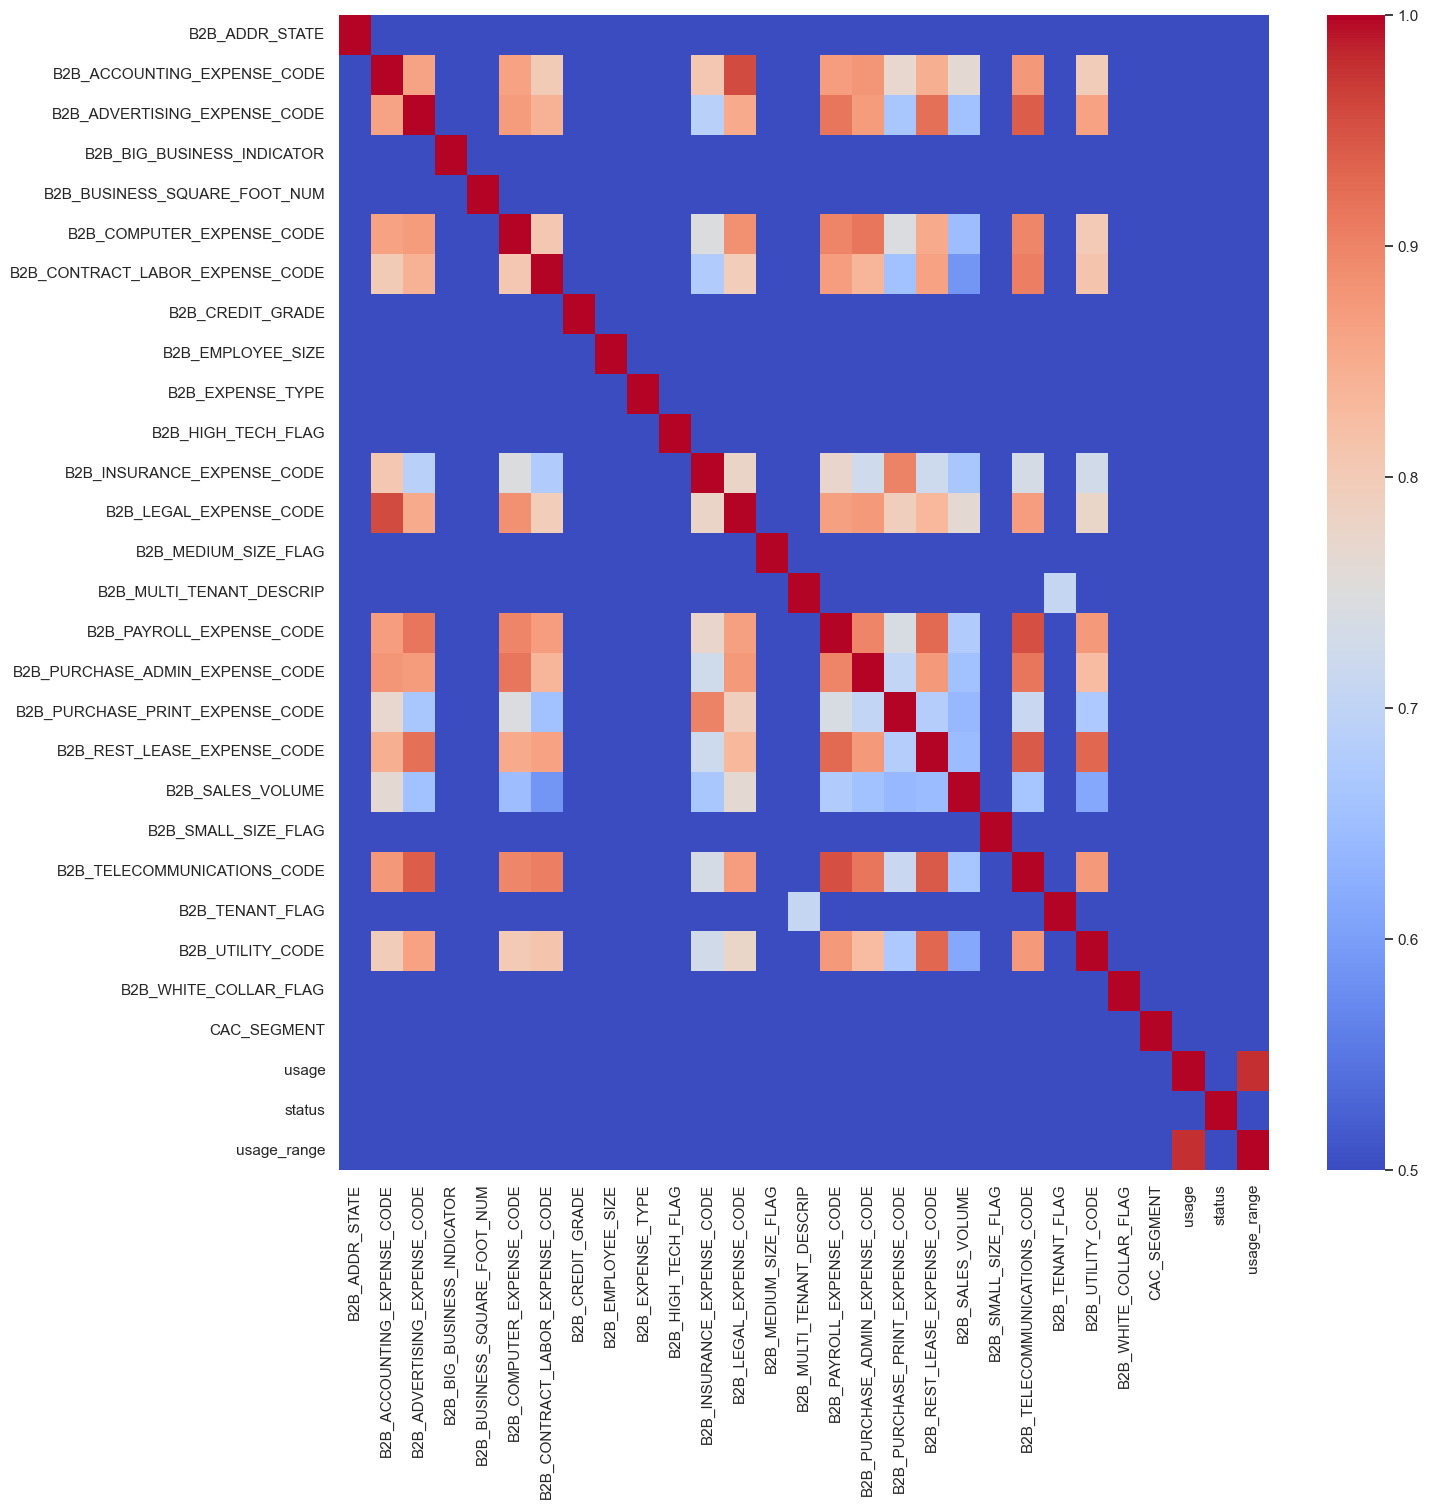

In [12]:
# Heat map showing correlation among attributes
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(independents.iloc[:,1:].corr(),cmap='coolwarm',vmin=.5)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

---
## Clustering <a class="anchor" id="Clustering"></a>

However, it's important to note that clustering is an exploratory technique, and the resulting clusters may not have any causal or predictive relationship with the outcome of interest. In some cases, clustering may be used as a preprocessing step for other machine learning techniques, such as classification or regression, where the resulting clusters are used as a feature or input to the model.

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

In [ ]:
df_firmographic_copy = df_firmographic.copy()
df_cluster = df_firmographic_copy[[ "B2B_ADDR_STATE", "B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_cluster_copy = df_cluster.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cluster = df_cluster.apply(le.fit_transform)
df_cluster

In [ ]:
# Importing Libraries

# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install kmodes
#from kmodes.kmodes import KModes

Cao initialization

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

In [ ]:
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

Huang initialization

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_cluster)

In [ ]:
fitClusters_huang

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

Choosing K by comparing Cost against each K

In [ ]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

"elbow curve" -> k=3, we do CAO again

In [ ]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

In [ ]:
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

combine the prediction to the OG df

In [ ]:
df_cluster = df_cluster_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cluster, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

Cluster Identification (Graphic)

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
cluster_0

In [ ]:
cluster_1

In [ ]:
cluster_2

In [ ]:
variable_list = ["B2B_ADDR_STATE", "B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE"]
for variable in variable_list:
    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf[variable],order=combinedDf[variable].value_counts().index,hue=combinedDf['cluster_predicted'])
    plt.show()

In [ ]:
variable_list = ["CAC_SEGMENT","B2B_WHITE_COLLAR_PRCNT"]
for variable in variable_list:
    plt.subplots(figsize = [35,16])
    sns.countplot(x=combinedDf[variable],order=combinedDf[variable].value_counts().index[:12],hue=combinedDf['cluster_predicted'])
    plt.show()

need dictionary / explaination of each variable
https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7
https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

---
## Principal Component Analysis (PCA) <a class="anchor" id="PCA"></a>

In [15]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
# Standardize data before applying PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Apply PCA
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [25]:
dtree = DecisionTreeRegressor(max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='random')
dtree.fit(X_train,y_train)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=12, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [26]:
dtree.score(X_train,y_train)

0.11421584646989036

In [27]:
dtree.score(X_test,y_test)

0.11297819352662564

In [28]:
y_pred= dtree.predict(X_test_pca)

In [29]:
# Predict on test set and calculate accuracy
from sklearn.metrics import mean_squared_error, r2_score 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

# Scikit-learn doesn't have adjusted r-square, hence custom code
n = y_pred.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print(f"rmse: {rmse}, r2: {r2}, adjr2: {adj_r_sq}")

rmse: 1.39110721032952, r2: -0.08074399016729616, adjr2: -0.0825688314312556


In [30]:
# Calculate explained variance ratio
exp_var = pca.explained_variance_ratio_
print("Explained variance ratio:", exp_var)

Explained variance ratio: [0.46140795 0.07419984 0.06544032 0.05120054 0.04991355 0.03972378
 0.03805094 0.03181833 0.03123807 0.02738368 0.02692303 0.02299278
 0.01795645 0.0120804  0.01123355 0.00939945 0.00645713 0.00544838
 0.0045     0.00328947 0.00270727 0.00253009 0.00180085 0.00121963
 0.00108453]


In [31]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a logistic regression model on the transformed data
clf = LogisticRegression(random_state=0)
clf.fit(X_train_pca, y_train)

# Predict on test set and calculate accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate explained variance ratio
exp_var = pca.explained_variance_ratio_
print("Explained variance ratio:", exp_var)

Accuracy: 0.2676645091693635
Explained variance ratio: [0.46140795 0.07419984]


In [34]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X.columns).sort_values(ascending=False)

B2B_EMPLOYEE_SIZE                  0.608674
B2B_SMALL_SIZE_FLAG                0.363423
B2B_WHITE_COLLAR_FLAG              0.024796
B2B_PURCHASE_PRINT_EXPENSE_CODE    0.003107
B2B_ACCOUNTING_EXPENSE_CODE        0.000000
B2B_MULTI_TENANT_DESCRIP           0.000000
B2B_UTILITY_CODE                   0.000000
B2B_TENANT_FLAG                    0.000000
B2B_TELECOMMUNICATIONS_CODE        0.000000
B2B_SALES_VOLUME                   0.000000
B2B_REST_LEASE_EXPENSE_CODE        0.000000
B2B_PURCHASE_ADMIN_EXPENSE_CODE    0.000000
B2B_PAYROLL_EXPENSE_CODE           0.000000
B2B_MEDIUM_SIZE_FLAG               0.000000
B2B_ADVERTISING_EXPENSE_CODE       0.000000
B2B_LEGAL_EXPENSE_CODE             0.000000
B2B_INSURANCE_EXPENSE_CODE         0.000000
B2B_HIGH_TECH_FLAG                 0.000000
B2B_EXPENSE_TYPE                   0.000000
B2B_CREDIT_GRADE                   0.000000
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.000000
B2B_COMPUTER_EXPENSE_CODE          0.000000
B2B_BUSINESS_SQUARE_FOOT_NUM    

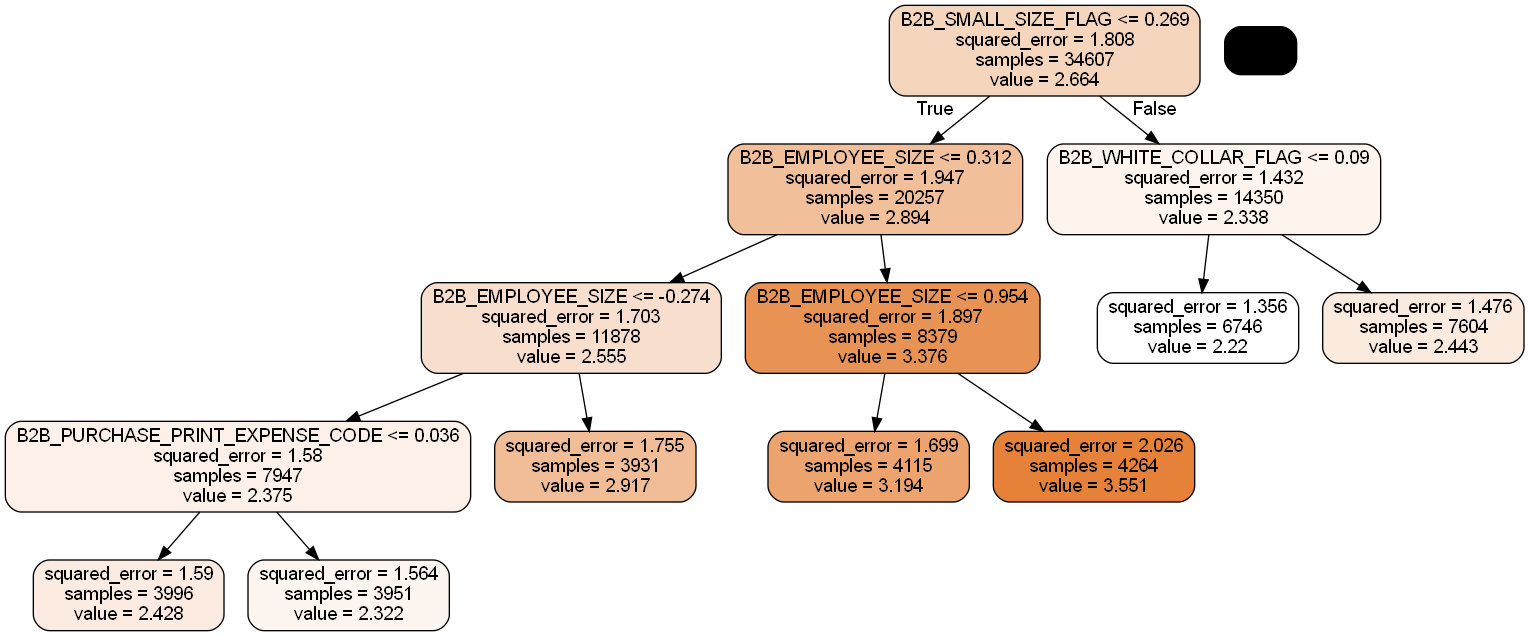

In [33]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree,filled=True,rounded=True, feature_names=X.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

---
## Association Rule Mining <a class="anchor" id="AssociationRuleMining"></a>

---
## Self-Organizing Maps (SOMs) <a class="anchor" id="SOM"></a>

In [ ]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install MiniSom

from minisom import MiniSom
from sklearn import preprocessing

In [ ]:
df_train=df.iloc[:,2:-2]

In [ ]:
le = preprocessing.LabelEncoder()
df_train = df_train.apply(le.fit_transform)
df_train = np.array(df_train)
df_train

In [ ]:
# train MiniSom model
som_shape=(30,30)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=68, sigma=1.0, learning_rate=0.5)
som.random_weights_init(df_train)
som.train_random(df_train, 100)

In [ ]:
winner = np.array([som.winner(x) for x in df_train]).T
cluster_index = np.ravel_multi_index(winner, som_shape)

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
plt.figure(figsize = [35,16])
for c in np.unique(cluster_index):
    plt.scatter(df_train[cluster_index == c, 0],
                df_train[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();